# 공부용 코드

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(456)
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from konlpy.tag import Mecab

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Practice/data/dacon_data/president/train.csv").iloc[:, 1:].dropna(how = 'any')
train_data.index = range(len(train_data))
test_data = pd.read_csv("/content/drive/MyDrive/Practice/data/dacon_data/president/test.csv").iloc[:, 1:]
submission = pd.read_csv("/content/drive/MyDrive/Practice/data/dacon_data/president/sample_submission.csv")

In [ ]:
train_data.shape, test_data.shape

((39992, 2), (5000, 1))

In [ ]:
train_data.head()

,category,data
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [ ]:
test_data.head()

,data
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 11년간 일하고 혈암과 백혈병 진단을 받은 ...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


In [ ]:
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

In [ ]:
train_data.data = clean_text(train_data.data)
test_data.data = clean_text(test_data.data)

In [ ]:
train_data_text = list(train_data['data'])

train_clear_text = []

for i in tqdm(range(len(train_data_text))):
  train_clear_text.append(str(train_data_text[i]).replace('\\n', ''))
train_data['clear_text'] = train_clear_text
train_data.head()

100%|██████████| 39992/39992 [00:00<00:00, 379784.38it/s]


,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...","빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...","티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [ ]:
print(train_data.iloc[0,1])
# print(train_data.iloc[0,0])

신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지 마시고\n보편적으로 모든국민이 수긍할 수 있는 복지정책 펴 주시길 바랍니다.\n저도 신혼부부이지만 당첨되는 사람 로또되는 이런주택정책 반대합니다.\n국민세금을 일부 사람들에게 퍼주기식이 되면 안되죠..\n그 세금으로 우리아이 안전하게 맡길 수 있는 보육시설을 전국에 설치해 주세요..\n대기업들은 솔선수범해서 모든 사업장에 의무설치 할 수 있도록 하시구요..\n집 보다 애 맡길데가 없어 경력단절 되는게 더 괴롭습니다.!\n집은 개인의 능력을 키워 사는게 맞습니다.\n그 능력을 키울수 있도록 육아 전담에 힘을 기울이는게 맞습니다.\n우리아이 부모가 키우는거 맞지만 이제는 국가가\n책임지는 시대로 가는게 맞다고 봅니다.\n그렇잖아도 부동산 가격 자꾸 올라가는게 정부정책이 잘못 되었다고 봅니다.\n부동산은 그냥 내버려 두세요! 좀!\n건들수록 역효과네요..


In [ ]:
train_clear_text = list(train_data['clear_text'])

train_clear_text2 = []

for text in train_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  train_clear_text2.append(temp)
train_data['clear_text'] = train_clear_text2
train_data.head()

,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 남자 도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...",빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올...
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...",티비 세 세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일...
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타...


In [ ]:
test_data_text = list(test_data['data'])

test_clear_text = []

for i in tqdm(range(len(test_data_text))):
  test_clear_text.append(test_data_text[i].replace('\\n', ' '))
test_data['clear_text'] = test_clear_text
test_data.head()

100%|██████████| 5000/5000 [00:00<00:00, 277974.66it/s]


,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에 *지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...","방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


In [ ]:
test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  test_clear_text2.append(temp)
test_data['clear_text'] = test_clear_text2
test_data.head()

,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여 국공립 유치원 부지 학보와건립및 증설에 지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...",방과후 유치원 어린이집 영어교육을 유지시켜주세요 저는 아이 셋 키우는 평범한 주부...


In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stop_df = pd.read_csv('/content/drive/MyDrive/Practice/data/dacon_data/president/한국어불용어100.txt', sep = '\t', header = None, names = ['형태','품사','비율'])
stop_df.tail()

,형태,품사,비율
95,원,NNB,0.000492
96,잘,MAG,0.000491
97,통하,VV,0.000487
98,소리,NNG,0.000486
99,놓,VX,0.000483


In [ ]:
stop_df.loc[100] = '가'
stop_df.loc[101] = '합니다'

In [ ]:
stop_words = list(stop_df.형태)

In [ ]:
ind_list = [24885, 14916, 14605, 6641, 17406, 26957, 2175, 6885, 8947, 14966, 8198, 25955, 39167,21707, 12678,
           3023, 31971, 3730, 37153, 33481, 33369, 12927, 30773, 36431,12373,  37525,27530, 8958, 16884, 18072,
           4478, 7940, 16400, 16656]
train_data = train_data.query('index not in @ind_list') 
train_data.index = range(0, len(train_data))

In [ ]:
X_train = []

text = list(train_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

100%|██████████| 39958/39958 [01:27<00:00, 454.62it/s]


In [ ]:
X_test = []

text = list(test_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████| 5000/5000 [00:25<00:00, 198.40it/s]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,  ReduceLROnPlateau
from tensorflow.keras.regularizers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 11
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 45144
등장 빈도가 10번 이하인 희귀 단어의 수: 32528
단어 집합에서 희귀 단어의 비율: 72.05387205387206
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.2528366323744806


In [ ]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 12617


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
token_X_train = tokenizer.texts_to_sequences(X_train)
token_X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
y_train = to_categorical(np.array(train_data['category']))

In [ ]:
drop_train = [index for index, sentence in enumerate(token_X_train) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
del_X_train = np.delete(token_X_train, drop_train, axis=0)
del_y_train = np.delete(y_train, drop_train, axis=0)
print(len(del_X_train))
print(len(del_y_train))

39933
39933


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


train data의 최대 길이 : 5661
train data의 평균 길이 : 66.62750106428267


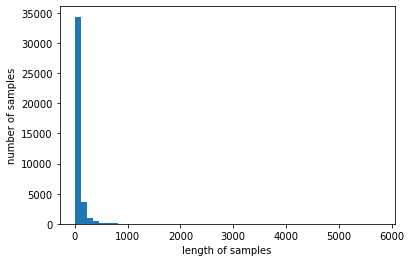

In [ ]:
print('train data의 최대 길이 :',max(len(l) for l in del_X_train))
print('train data의 평균 길이 :',sum(map(len, del_X_train))/len(del_X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

test data의 최대 길이 :  3806
test data의 평균 길이 :  66.188


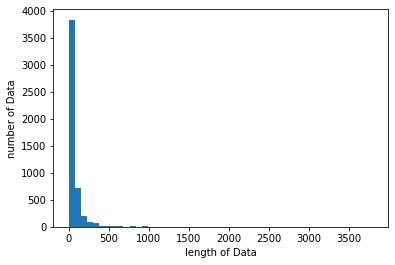

In [ ]:
print("test data의 최대 길이 : ", max(len(l) for l in token_X_test))
print("test data의 평균 길이 : ", sum(map(len, token_X_test))/ len(token_X_test))
plt.hist([len(s) for s in token_X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 300
below_threshold_len(max_len, del_X_train)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 97.22284827085367


## 학습모델 만들기

In [ ]:
pad_X_train = pad_sequences(del_X_train, maxlen = max_len)
pad_X_test = pad_sequences(token_X_test, maxlen = max_len)

In [ ]:
model1 = Sequential()
model1.add(Embedding(vocab_size,64, input_length=max_len))
model1.add(Conv1D(64, 5, activation = 'relu', padding = 'same', kernel_regularizer=l2(0.01)))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(3, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           807488    
                                                                 
 conv1d (Conv1D)             (None, 300, 64)           20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 828,227
Trainable params: 828,227
Non-trainable params: 0
_________________________________________________________________


## 학습시키기

In [ ]:
model1.compile(optimizer=RMSprop(lr = .0005), loss='categorical_crossentropy', metrics=['acc'])
reLR = ReduceLROnPlateau(patience = 5, verbose=1, factor = .2)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 2)
mc = ModelCheckpoint(filepath = '1028_1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True, restore_best_weights = True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history1 = model1.fit(pad_X_train, del_y_train, epochs=30, batch_size= 64, shuffle = True, validation_split=0.2, verbose = 1, callbacks=[es, mc, reLR])

In [ ]:
model1 = load_model('1028_1.h5') # val_acc = 0.87893

# 직접짜본 코드

## 데이터 받기 데이터 정보 확인

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(456)
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Practice/data/dacon_data/president/train.csv").iloc[:, 1:].dropna(how = 'any')
train.index = range(len(train))
test = pd.read_csv("/content/drive/MyDrive/Practice/data/dacon_data/president/test.csv").iloc[:, 1:]
submission = pd.read_csv("/content/drive/MyDrive/Practice/data/dacon_data/president/sample_submission.csv")

In [ ]:
train.head()

,category,data
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39992 entries, 0 to 39991
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  39992 non-null  int64 
 1   data      39992 non-null  object
dtypes: int64(1), object(1)
memory usage: 625.0+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


## 데이터 불순물 제거

In [ ]:
max(train['data'])

'🚨축구 국대감독 파올루 벤투 감독 당장 경질 및 축구협회 적폐청산 🚨. 파울루 벤투 감독과 축구협회의 역시 아니한 선수 전술,관리 등으로 인해서 이번 아시안컵 우승 실패 및 한국이 대회 4강에 오르지 못한 것은 2004년 이후 15년만이라고 합니다👿😠😡🤬🤬🤬\\n벤투감독이 전술을 그대로 고집부리는건 마치 슈틸리케,신태용 감독과 똑같고 고집불통,융통성없는 박근혜와 같다고 보시면 됩니다!\\n축구협회도 선수 부상 당했는데에도 팀 닥터 없고....\\n어쨌든 정부에서 파울루 벤투 강력 경질 및 축구협회 강력하게 적폐 적폐청산 실시하라😠👿👿😡👿😠😠🤬🤬🤬\\n적폐청산 하지 않을거우, 문재인 ㄹㅇ 탄핵이다🔥🔥🔥'

In [ ]:
import re
text = max(train['data'])
text_list = re.compile('[ㄱ-ㅎ가-힣]+').findall(text)
sentence = ''
for i in text_list:
  sentence += i + ' '
sentence

'축구 국대감독 파올루 벤투 감독 당장 경질 및 축구협회 적폐청산 파울루 벤투 감독과 축구협회의 역시 아니한 선수 전술 관리 등으로 인해서 이번 아시안컵 우승 실패 및 한국이 대회 강에 오르지 못한 것은 년 이후 년만이라고 합니다 벤투감독이 전술을 그대로 고집부리는건 마치 슈틸리케 신태용 감독과 똑같고 고집불통 융통성없는 박근혜와 같다고 보시면 됩니다 축구협회도 선수 부상 당했는데에도 팀 닥터 없고 어쨌든 정부에서 파울루 벤투 강력 경질 및 축구협회 강력하게 적폐 적폐청산 실시하라 적폐청산 하지 않을거우 문재인 ㄹㅇ 탄핵이다 '

In [ ]:
train_clean = train.data
sentences = []
for i in train_clean:
  text = i
  text_list = re.compile('[ㄱ-ㅎ가-힣]+').findall(text)
  sentence = ''
  for j in text_list:
    sentence += j + ' '
  sentences.append(sentence)
train['clean'] = sentences

In [ ]:
test_clean = test.data
sentences = []
for i in test_clean:
  text = i
  text_list = re.compile('[ㄱ-ㅎ가-힣]+').findall(text)
  sentence = ''
  for j in text_list:
    sentence += j + ' '
  sentences.append(sentence)
test['clean'] = sentences

In [ ]:
# 중복 제거
train.drop_duplicates(subset=['clean'], inplace=True)

In [ ]:
train.index = range(len(train))

In [ ]:
train_clean = train.clean
sentences = []
for i in train_clean:
  text = i
  text_list = re.compile('[^ㄱ-ㅎ가-힣]+').findall(text)
  sentence = ''
  for j in text_list:
    sentence += j + ' '
  sentences.append(sentence)

In [ ]:
idx = 0
for x,y in zip(sentences,train.clean):
  if x==y:
    train.drop([idx],inplace=True)
  idx += 1

In [ ]:
train.index = range(len(train))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39251 entries, 0 to 39250
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  39251 non-null  int64 
 1   data      39251 non-null  object
 2   clean     39251 non-null  object
dtypes: int64(1), object(2)
memory usage: 920.1+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    5000 non-null   object
 1   clean   5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


## 센텐스피스 단어장 만들기

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

In [ ]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

In [ ]:
!tar -xzvf korean-english-park.train.tar.gz

korean-english-park.train.en
korean-english-park.train.ko


In [ ]:
!pip install sentencepiece

In [ ]:
import sentencepiece as spm
import csv

In [ ]:
temp_file = 'korean-english-park.train.ko'
vocab_size = 8000
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size) +
    "--model_type=char" # model_type ='word' # Choose from unigram (default), bpe, char, or word
)

In [ ]:
vocab_list = pd.read_csv('korean_spm.vocab', sep='\t', header=None, quoting = csv.QUOTE_NONE)
vocab_list.sample(10)

,0,1
6725,▁앨런,-10.95040
2309,▁교통,-9.55247
64,시,-6.60400
6575,▁모금,-10.89980
7357,▁경제학자들,-11.21340
1442,▁목표,-9.06786
4115,▁이하,-10.18890
5568,▁제목,-10.60170
2938,▁분노,-9.81806
4459,▁그림,-10.29280


## 불용어제거 & 인코딩

In [ ]:
stop_df = pd.read_csv('/content/drive/MyDrive/Practice/data/한국어불용어100.txt', sep = '\t', header = None, names = ['형태','품사','비율'])
stop_df.tail()

,형태,품사,비율
95,원,NNB,0.000492
96,잘,MAG,0.000491
97,통하,VV,0.000487
98,소리,NNG,0.000486
99,놓,VX,0.000483


In [ ]:
stop_df.loc[100] = '가'
stop_df.loc[101] = '합니다'

In [ ]:
stop_words = list(stop_df.형태)

In [ ]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

def sp_tokenize(s, corpus):
    global stop_words
    result = []
    for sentence in corpus:
        curr_data = []
        curr_data = s.encode_as_pieces(sentence)
        curr_data = [word for word in curr_data if not word in stop_words]
        result.append(curr_data)

    results = []
    
    for arr in result:
      r = ''
      for string in arr:
        if string == '▁':
          r += ' '
        else:
          r += string
      results.append(r)

    tensor = []

    for sen in results:
      tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    return tensor, word_index, index_word

In [ ]:
# sp_tokenize(s, corpus) 사용예제
my_corpus = train.clean
X_train, word_index, index_word = sp_tokenize(s, my_corpus)

In [ ]:
X_train[0][:10]

[271, 3517, 105, 105, 113, 1359, 2770, 1341, 321, 3750]

In [ ]:
my_corpus = test.clean
X_test, word_index, index_word = sp_tokenize(s, my_corpus)

In [ ]:
print(len(X_test))
print(len(X_train))

5000
39251


## 데이터 패딩

In [ ]:
# 데이터셋 내 문장 길이 분포
total_data_text = list(X_train) + list(X_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장 길이의 평균값, 최대값, 표준편차를 계산
print('문장길이 평균 :', np.mean(num_tokens))
print('문장길이 최대 :', np.max(num_tokens))
print('문장길이 표준편차 :', np.std(num_tokens))

# 예를 들어 최대 길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)

maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen  설정값 이내에 포함됩니다. '.
      format(np.sum(num_tokens < max_tokens)/ len(num_tokens)))

문장길이 평균 : 246.21357709430296
문장길이 최대 : 14485
문장길이 표준편차 : 388.1366358062897
pad_sequences maxlen :  1022
전체 문장의 0.9688368624437865%가 maxlen  설정값 이내에 포함됩니다. 


In [ ]:
min(train.clean)

'ㄱ초등학교 돌봄교실 수용인원을 늘려주세요 돌봄교실이라는 정책의 도움을 받고싶으나 학교에서 제한적인 인원만 받고있고 학년 이상은 이용할수없습니다 맞벌이가정 한부모가정의 아이들은 하교후 방학때 정말 막막합니다 아직 어린아이들을 학원으로만 하루종일 돌릴수도 없구요 고양시 덕양구소재 성신초등학교 예비학부모로써 말씀드렸습니다 '

In [ ]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train, value = 0, padding = 'pre', maxlen = maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, value = 0, padding = 'pre', maxlen = maxlen)

In [ ]:
Y_train = to_categorical(np.array(train['category']))
test.columns

Index(['data', 'clean'], dtype='object')

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(39251, 1022)
(39251, 3)
(5000, 1022)


## 학습용 데이터, 평가용 데이터

In [ ]:
int(39251*0.2)

7850

In [ ]:
x_val = X_train[:7851]
y_val = Y_train[:7851]

x_train = X_train[7851:]
y_train = Y_train[7851:]

## 학습모델 생성

In [ ]:
vocab_size = 10000
word_vector_dim = 200 # 2의 배수

model_1 = keras.Sequential()
model_1.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None, )))
model_1.add(keras.layers.LSTM(8))
model_1.add(keras.layers.Dense(8, activation='relu'))
model_1.add(keras.layers.Dense(3,activation='sigmoid'))
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 200)         2000000   
                                                                 
 lstm_3 (LSTM)               (None, 8)                 6688      
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 3)                 27        
                                                                 
Total params: 2,006,787
Trainable params: 2,006,787
Non-trainable params: 0
_________________________________________________________________


## 학습

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 15)
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # optimizer -> adam 이 제일 좋다
# binary_crossentropy 이진 분류에 사용

epochs = 100

history = model_1.fit(x_train, y_train, epochs=epochs, batch_size=512, validation_data=(x_val, y_val),
                    callbacks = [early_stopping], verbose=1)

Epoch 1/100
62/62 [==============================] - 7s 86ms/step - loss: 1.0363 - accuracy: 0.4688 - val_loss: 0.9080 - val_accuracy: 0.6330
Epoch 2/100
62/62 [==============================] - 5s 77ms/step - loss: 0.8227 - accuracy: 0.6719 - val_loss: 0.7586 - val_accuracy: 0.7109
Epoch 3/100
62/62 [==============================] - 6s 98ms/step - loss: 0.6145 - accuracy: 0.7948 - val_loss: 0.5624 - val_accuracy: 0.8114
Epoch 4/100
62/62 [==============================] - 5s 81ms/step - loss: 0.4838 - accuracy: 0.8449 - val_loss: 0.5520 - val_accuracy: 0.8103
Epoch 5/100
62/62 [==============================] - 5s 81ms/step - loss: 0.4546 - accuracy: 0.8546 - val_loss: 0.5264 - val_accuracy: 0.8232
Epoch 6/100
62/62 [==============================] - 5s 81ms/step - loss: 0.4162 - accuracy: 0.8682 - val_loss: 0.5214 - val_accuracy: 0.8205
Epoch 7/100
62/62 [==============================] - 5s 77ms/step - loss: 0.3815 - accuracy: 0.8807 - val_loss: 0.5197 - val_accuracy: 0.8268
Epoch 

## 학습, val 데이터 그래프 그리기

In [ ]:
history_dict = history.history

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

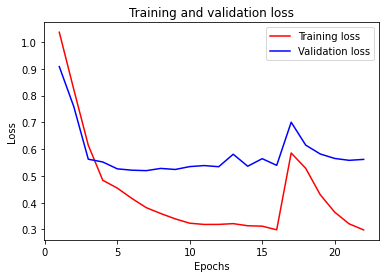

In [ ]:
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 테스트 예측

In [ ]:
answer = model_1.predict(X_test)
result = []
for a,b,c in answer:
  r = max(a,b,c)
  if r == a:
    result.append(0)
  elif r == b:
    result.append(1)
  else:
    result.append(2)

In [ ]:
test['category'] = result